In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import numpy as np
import powerlaw

In [2]:
%run Utilyties.ipynb

In [3]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  57896
* TOT Reply =  3000




In [4]:
print(G.number_of_nodes())
print(G.number_of_edges())

16675
52373


# Giant_component

In [5]:
conn_comps = sorted(nx.connected_components(G), key=len, reverse=True) #elenco delle componenti connesse per dimensione
G0 = G.subgraph(conn_comps[0])

# Reseilience_under_removal_of_nodes

In [16]:
def molloy_reed(degrees):
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)

def breakdown_threshold(degrees):
    K = molloy_reed(degrees)
    return 1 - (1/(K-1))

In [17]:
G_degs = list(dict(G.degree()).values())

In [18]:
print(molloy_reed(G_degs))
print(breakdown_threshold(G_degs))

7.281619190404798
0.8408053768162984


In [19]:
def random_node(g): # select a random node from graph
    return [np.random.choice(g.nodes())]

def dismantle(g, function, **args): # incrementally removes node from a graph and computes size of connected components
    total_nodes = g.number_of_nodes()
    removed_nodes = []
    components = []
    while len(g.nodes()) > 1:
        n = function(g, **args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps)>0:
            g_size  = max([len(c)for c in comps])/total_nodes
        components.append(g_size)
    return removed_nodes, components

def get_sorted_nodes(g, score, reverse=True): # sort nodes
    nodes = score(g)
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]
    srt = sorted(nodes, key = lambda k: k[1], reverse = reverse)
    return [x[0] for x in srt]

def plot_dismantle(x, y):
    plt.plot(x, y)
    plt.xlabel("Removed Nodes")
    plt.ylabel("Giant Component size")
    plt.show()

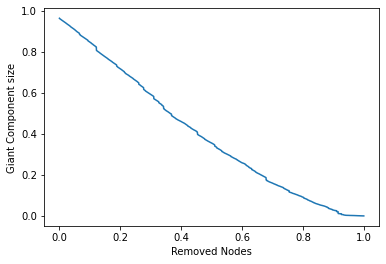

In [20]:
h = G.copy()
rn, comps = dismantle(h, random_node)
plot_dismantle(rn, comps)

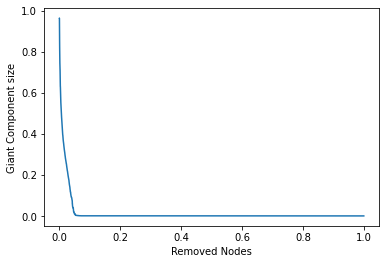

In [21]:
h = G.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
plot_dismantle(rn, comps)

# Weight_of_edges

In [7]:
def dismantle_edge(g, function, reverse): # incrementally removes edge from a graph and computes size of connected components
    total_edges = g.number_of_edges()
    total_nodes = g.number_of_nodes()
    removed_edges = []
    components = []
    while len(g.edges()) > 1:
        n, m = function(g, reverse)[0]
        g.remove_edge(n, m)
        removed_edges.append((len(removed_edges)+1)/total_edges)
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps)>0:
            g_size  = max([len(c)for c in comps])/total_nodes
        components.append(g_size)
    return removed_edges, components

def get_sorted_edges(g, reverse): # sort nodes
    edges = sorted(g.edges(data=True), key=lambda x: g.get_edge_data(x[0], x[1])["weight"], reverse = reverse)
    return [(x[0], x[1]) for x in edges]

def plot_dismantle_edge(x, y):
    plt.plot(x, y)
    plt.xlabel("Removed Edges")
    plt.ylabel("Giant Component size")
    plt.show()

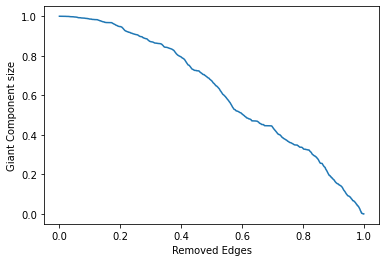

In [9]:
h = G0.copy()
rn, comps = dismantle_edge(h, get_sorted_edges, True) #da degree maggiore a minore
plot_dismantle_edge(rn, comps)

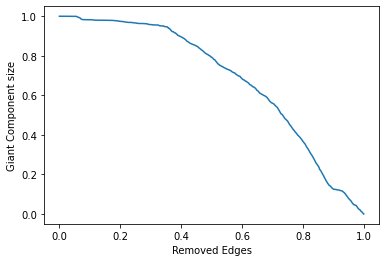

In [10]:
h = G0.copy()
rn, comps = dismantle_edge(h, get_sorted_edges, False) #da degree minore a maggiore
plot_dismantle_edge(rn, comps)

# Histogram_of_edges

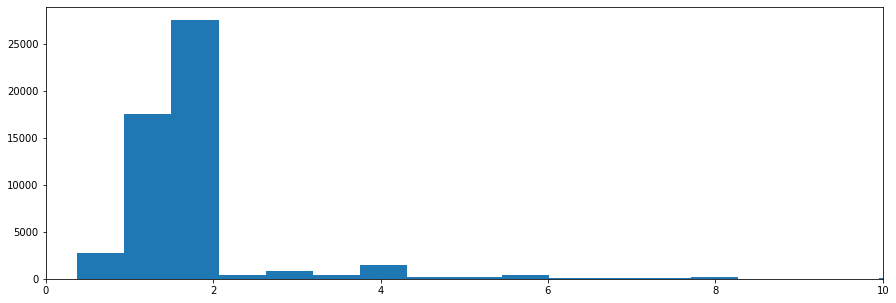

In [50]:
plt.figure(figsize=(15,5))
weight_list=[]
for edge in G.edges():
    #print(G.edges[edge]['weight'])
    weight_list.append(G.edges[edge]['weight'])
plt.hist(weight_list, bins=1000)
plt.xlim([0, 10])
#plt.loglog()

plt.show()

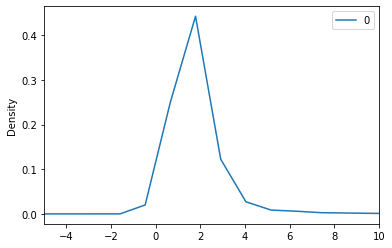

In [46]:
pd.DataFrame(weight_list).plot.kde()
plt.xlim([-5, 10])
#plt.loglog()
plt.show()

In [14]:
#edge_weights = nx.get_edge_attributes(G,'weight')
#G.remove_edges_from((e for e, w in edge_weights.items() if w > 1.1))

#### Lista numerata degli edges in ordine crescente di pesantezza  

In [36]:
edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=False)

n=0
n_e = G.number_of_edges()

for i, e in enumerate(edges):
    n+=1
    print(f"{i+1}. {round(n/n_e*100, 2)}% \t\t {e[0]} - {e[1]} \t\t {e[2]['weight']}")


1. 0.0% 		 AlexSanna38 - VotersItalia 		 0.375
2. 0.0% 		 CalcioPillole - sapienzaroma 		 0.375
3. 0.01% 		 CalcioPillole - fondoambiente 		 0.375
4. 0.01% 		 IlPrimatoN - mauroberruto 		 0.375
5. 0.01% 		 IlPrimatoN - signori_massimo 		 0.375
6. 0.01% 		 IlPrimatoN - DouglasKMurray 		 0.375
7. 0.01% 		 IlPrimatoN - Giorgiolaporta 		 0.375
8. 0.02% 		 IlPrimatoN - EnricoLetta 		 0.375
9. 0.02% 		 IlPrimatoN - Azzurri_Ar 		 0.375
10. 0.02% 		 IlPrimatoN - Azzurri 		 0.375
11. 0.02% 		 IlPrimatoN - FIGC 		 0.375
12. 0.02% 		 IlPrimatoN - Vivo_Azzurro 		 0.375
13. 0.02% 		 IlPrimatoN - DanieleTavolet2 		 0.375
14. 0.03% 		 fratotolo2 - pilloledirock 		 0.375
15. 0.03% 		 fratotolo2 - ilgiornale 		 0.375
16. 0.03% 		 fratotolo2 - GiorgiaMeloni 		 0.375
17. 0.03% 		 fratotolo2 - FratellidItalia 		 0.375
18. 0.03% 		 fratotolo2 - Corriere 		 0.375
19. 0.04% 		 fratotolo2 - LaStampa 		 0.375
20. 0.04% 		 fratotolo2 - fattoquotidiano 		 0.375
21. 0.04% 		 fratotolo2 - ilmessaggeroit 		 0.375
2